In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier


In [2]:
X_train = pd.read_csv("../dataset/X_train.csv")
X_test = pd.read_csv("../dataset/X_test.csv")
y_train = pd.read_csv("../dataset/y_train.csv").values.ravel()
y_test = pd.read_csv("../dataset/y_test.csv").values.ravel()

In [3]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df

,feature,importance
0,url_length,0.267001
1,valid_url,0.163595
6,nb_dots,0.138658
4,path_length,0.130995
5,isHttps,0.074005
7,nb_hyphens,0.061394
10,nb_www,0.054436
3,sensitive_words_count,0.033130
11,nb_com,0.027047
9,nb_or,0.026802


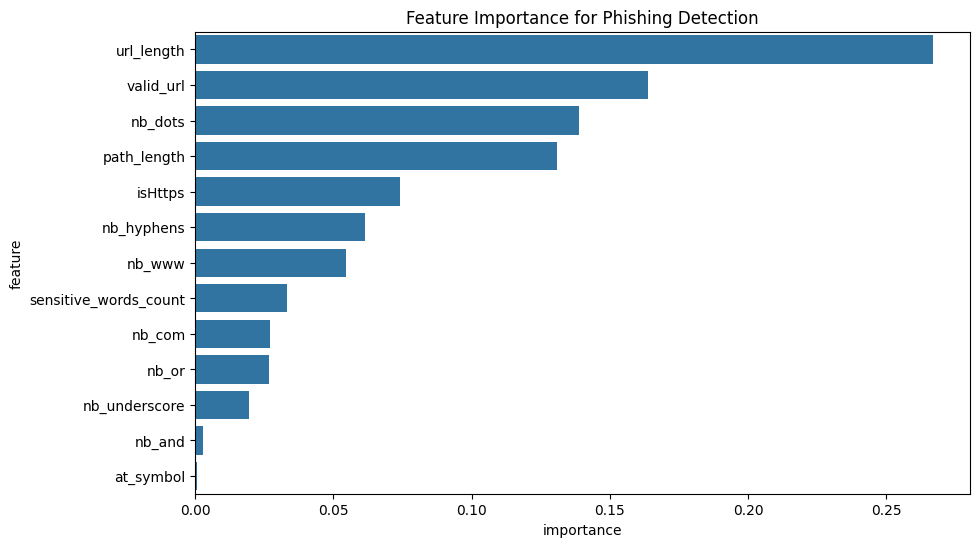

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance_df
)
plt.title("Feature Importance for Phishing Detection")
plt.show()

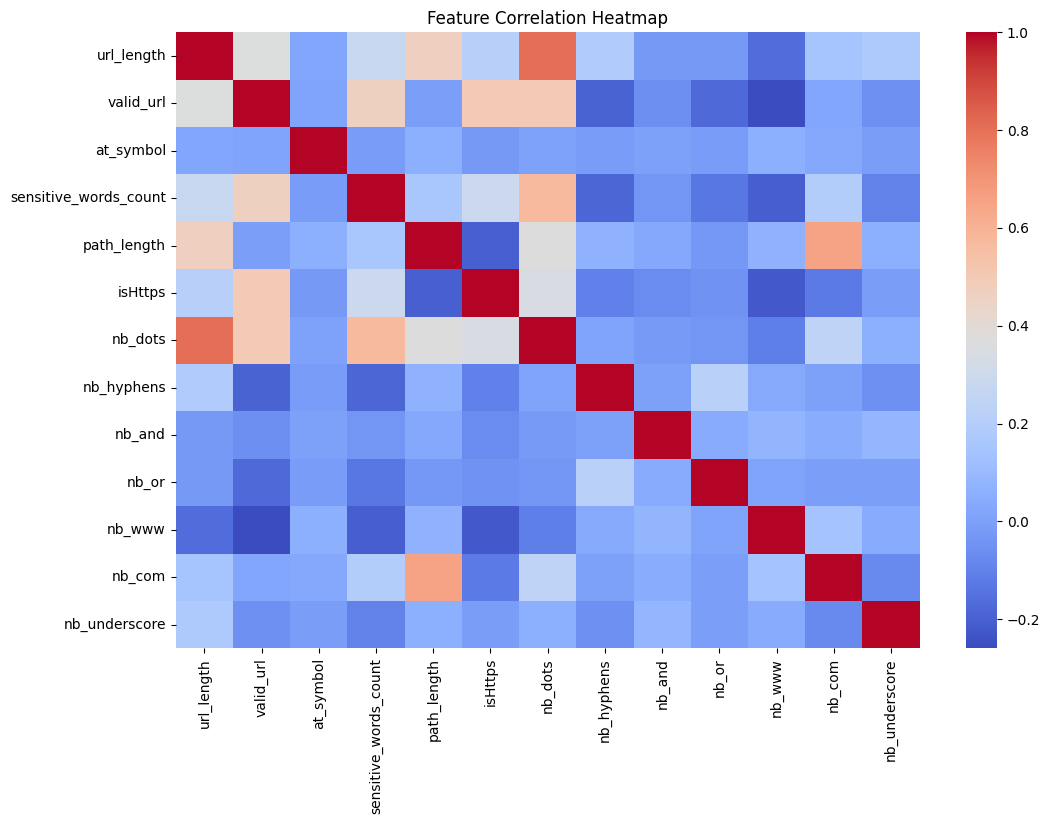

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(
    X_train.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
low_importance_features = feature_importance_df[
    feature_importance_df["importance"] < 0.01
]["feature"].tolist()

low_importance_features

X_train_selected = X_train.drop(columns=low_importance_features)
X_test_selected = X_test.drop(columns=low_importance_features)

In [8]:
rf.fit(X_train_selected, y_train)

print("Model retrained with selected features.")

Model retrained with selected features.
